# Exploration of HS Graduate Data

We just wanted to look at this dataset and start to get an idea of what it looks like.  It's HUGE!  Just to explore this data, we would need to have a few people help look through it.  One task would be to sort through all of the sinulgar coorelations.  Perhaps, some clustering would help start some ideas.


>**Problem Statement**
In 2001, the U.S. national on-time high school graduation rate was only 71.7%. As a result of progress over the last decade, that figure is now 81.4%!  To put that in perspective, 1.8 million more students graduated from from high school in 2013 than in 2004. This is good news, but to reach the GradNation campaign goal of 90 % on-time completion by 2020, over 300,000 additional graduates need to graduate in the class of 2020 than did in 2013.

>Recent progress is due not just to changing demographic and economic trends, but also the efforts of leaders in schools, districts, communities and states who are working hard to drive change. New analysis of district-level data shows that some school districts are making tremendous progress, while others are lagging or even regressing. We need to find out more about the root causes so that we can take action.

>We already understand some of the reasons students don’t make it through high school. Income, ethnicity, family dynamics, and pregnancy (just to name a few) all play a significant part. But what are the other factors affecting graduation rates that we don’t know about? Does bullying play a part? Crime? What about local gas prices & transportation, or the layout of a city? We need your help to find the answers.

>Source: 2015 Building a GradNation Report"

>http://datafordiplomas.devpost.com/details/resources

In [21]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

In [179]:
census_df = pd.read_csv('/Users/davidyerrington/Downloads/Merged Data/GRADUATION_WITH_CENSUS.csv')
# setup better columns names

rename_map = {
    'STNAM': 'state',
    'FIPST': 'state_code',
    'ALL_COHORT_1112': 'total',
    'ALL_RATE_1112': 'total_rate',
    'MAM_COHORT_1112': 'native',
    'MAM_RATE_1112': 'native_rate',
    'MAS_COHORT_1112': 'asian',
    'MAS_RATE_1112': 'asian_rate',
    'MBL_COHORT_1112': 'black',
    'MBL_RATE_1112': 'black_rate',
    'MHI_COHORT_1112': 'hispanic',
    'MHI_RATE_1112': 'hispanic_rate',
    'MTR_COHORT_1112': '2mix',
    'MTR_RATE_1112': '2mix_rate',
    'MWH_COHORT_1112': 'white',
    'MWH_RATE_1112': 'white_rate',
    'CWD_COHORT_1112': 'disabled',
    'CWD_RATE_1112': 'disabled_rate',
    'ECD_COHORT_1112': 'poor',
    'ECD_RATE_1112': 'poor_rate',
    'LEP_COHORT_1112': 'illiterate',
    'LEP_RATE_1112': 'illiterate_rate',
}

census_df.rename(columns=rename_map, inplace=True)
census_df.head(5)


,Unnamed: 0,leaid11,state,state_code,leanm11,total,total_rate,native,native_rate,asian,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,1,100005,ALABAMA,1,Albertville City,268,83,NaN,NaN,NaN,...,100,0,63.14,2.48,0,10.39,87.13,55.74,7.40,0
1,2,100006,ALABAMA,1,Marshall County,424,79,2,PS,1,...,100,0,63.27,3.52,0,17.02,79.45,56.31,6.96,0
2,3,100007,ALABAMA,1,Hoover City,1042,91,1,PS,71,...,100,0,81.77,1.97,0,2.98,95.06,81.77,0.00,0
3,4,100008,ALABAMA,1,Madison City,836,91,4,PS,44,...,100,0,67.06,4.38,0,6.99,88.63,58.64,8.42,0
4,5,100011,ALABAMA,1,Leeds City,117,72,NaN,NaN,NaN,...,100,0,60.84,3.82,0,17.87,78.31,53.11,7.73,0


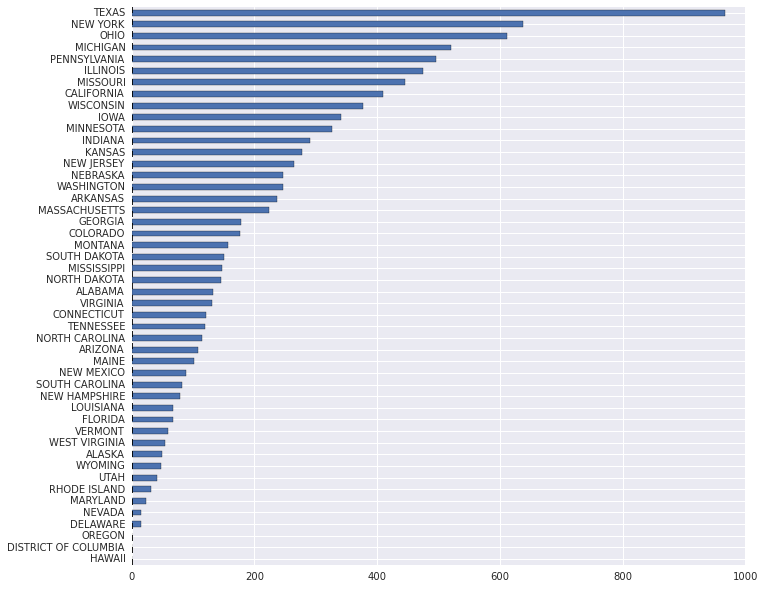

In [180]:
state_groups = census_df.groupby('state')
census_df['state'].value_counts().order().plot(kind="barh", figsize=(11,10))

## imputation

By state, fill non-numerics with cooresponding state means.

In [195]:
column_mask = rename_map.values()

to_impute = ['white', 'black', 'asian', 'disabled', 'poor', 'illiterate'] # 

for attribute in to_impute:
    
    imputes = census_df.groupby('state')[attribute].transform(lambda g: g.fillna(g.mean()))
    census_df[attribute].fillna(imputes, inplace=True)
    
census_df[to_impute] = census_df[to_impute].fillna(0)

In [196]:
census_df[to_impute].describe().T

,count,mean,std,min,25%,50%,75%,max
white,9907,187.216985,352.451652,1,37,91.000000,201.434659,8118
black,9907,71.505310,321.140712,0,4,24.628319,51.000000,14134
asian,9907,25.694372,142.200669,0,3,8.000000,24.882716,10882
disabled,9907,40.585759,116.362705,1,7,16.000000,36.000000,5177
poor,9907,145.886338,641.347122,1,16,39.000000,100.000000,38685
illiterate,9907,29.703697,161.496356,0,5,10.933333,21.066265,12243


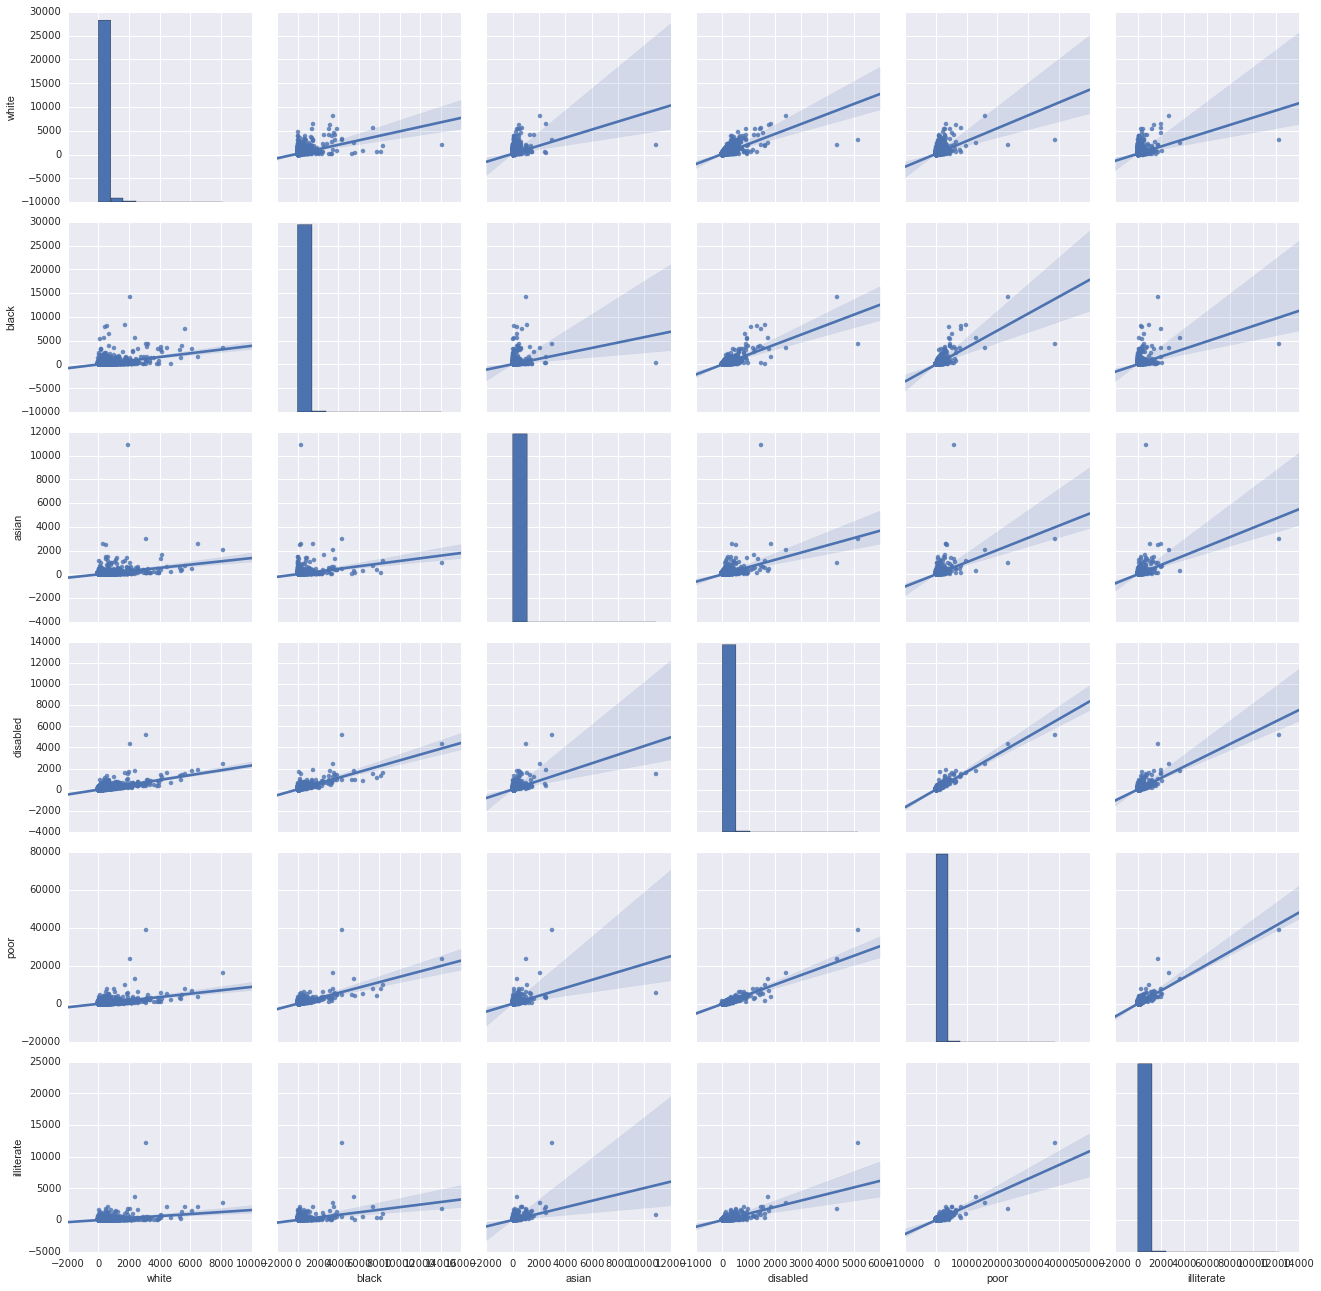

In [200]:
# sns.pairplot(census_df[['white', 'black']])
# census_df[census_df['asian'].isnull()].fillna(0)
# census_df[to_impute]['asian'].isnull()

sns.pairplot(census_df[to_impute], kind='reg')




In [243]:
# sns.heatmap()
cali = census_df[census_df['state'] == "CALIFORNIA"].groupby(['state', 'County_name'])[to_impute]
census_df[census_df['state'] == "CALIFORNIA"].corr()['illiterate'].order(ascending=False).head(10)

illiterate    1.000000
poor          0.983977
hispanic      0.983537
total         0.963532
disabled      0.931417
black         0.889206
asian         0.621276
2mix          0.615777
native        0.496304
white         0.442552
Name: illiterate, dtype: float64

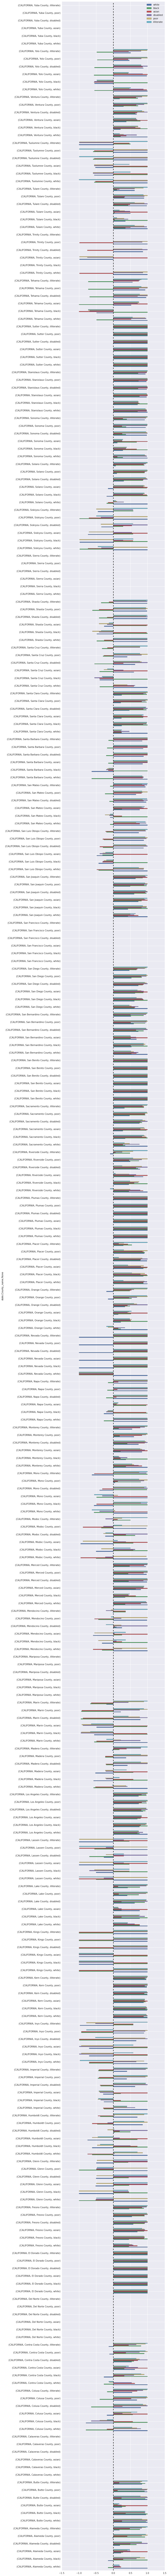

In [275]:
cali.corr().fillna(0).plot(kind='barh', figsize=(8, 200))

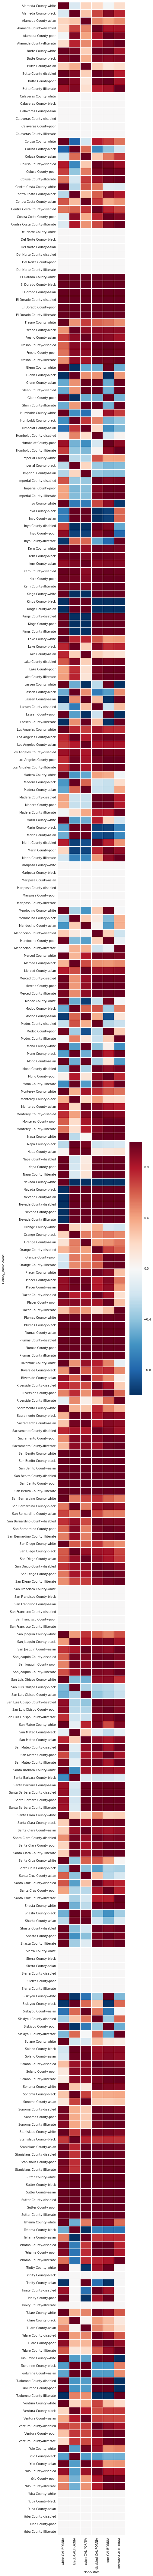

In [274]:
cali_cor   =  cali.corr().fillna(0)
temp_pivot =  cali_cor.unstack(level=0)
sns.set_context(rc={"figure.figsize": (5, 150)})
sns.heatmap(temp_pivot)
